<a href="https://colab.research.google.com/github/wqiu96/summer_project/blob/master/src/value_iter_dirichlet_1d_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import time
start_time = time.time()

from tqdm import tqdm
import matplotlib.pyplot as plt

In [44]:
a=[0,0]
A= np.array([[1,2],[3,4]])
A[tuple(a)]

1

__Goal__

Implement value iteration on 1d HJB with Dirichlet data and verify with the explicit solution on Whittle’s “Flypaper”

__Ref__

- [1] Chap V.7 of [Roger and Williams 2000] 

- [2] P97, Example 4 of [Kushner and Dupuis 2001]

- [previous version](https://github.com/songqsh/foo1/blob/master/src/value_iter_dirichlet_1d.ipynb)


__Problem setup__

We want to solve HJB
$$\inf_a \{b(x,a) v'(x) + \frac 1 2 \sigma^2 v''(x) - \lambda v(x) + \ell(x,a)\} = 0, \quad \hbox{ on } O = (l, u)$$
with Dirichlet data
$$v(x) = g(x), \quad x= l, u.$$

It's equivalent to the following stochastic control formulation in a broad sense. Given a controlled diffusion
$$d X_t = b(X_t, a_t) dt + \sigma dW_t$$
we seek for the value function
$$v(x) = \inf_{a(\cdot)} \mathbb E^x \Big[\int_0^\tau e^{-\lambda s} \ell(X_s, a_s) ds + e^{-\lambda \tau} g(X_\tau) \Big],$$
where $\tau$ is
$$\tau = \inf\{t>0: X_t \notin O\}.$$


__MDP discretization__

One can use central finite difference scheme with parameter $h$ to obtain the following MDP. 

- Let $X^h$ be a controlled Markov chain on its state space 
$$\mathbb  R^h = \{h i: i\in \mathbb Z\}.$$

- transition probability is, with sufficiently small $h>0$, 
$$p^h(x+h|x, a) = \frac{b(x,a) + \sigma^2}{2\sigma^2}$$
and
$$p^h(x+h|x, a) = \frac{-b(x,a) + \sigma^2}{2\sigma^2}.$$

- terminal time is
$$\tau^h = \inf\{t>0: X^h \notin O \}.$$

- value function is
$$v^h(x) = \inf_{a^h} \mathbb E^x \Big[ 
\sum_{t=0}^{\tau^h-1} \Lambda^{-t} \ell^h(X^h_t, a^h_t) + 
\Lambda^{-\tau^h} g(X_{\tau^h})
\Big],$$
where
$$
\Lambda = 1 + \lambda \frac{h^2}{\sigma^2}.
$$

__Rk__

There is essential difference of above MDP approximation using central FDM from the one
using upward FDM provided by P97 of [2].

__benchmark__


We will recall a simple stochastic control problem, so called 
Whittle's ``flypaper'' given in [1]. This is a homogenous 
stochastic exit problem, which can be explicitly solved out.


Let parameters be given by

- $O = (0, z)$

- $\sigma = 1$

- $b(x,a) = a$

- $\lambda = 0$

- $\ell(x,a) = \frac 1 2 (a^2+1)$

- $g(x) = - \ln (c_1 e^x + c_2 e^{-x}).$

The value function is 
$$v(x) = g(x)$$
and the optimal policy is
$$a^*(x) = - g'(x).$$

__Ex__ In the above Whittle's "flypaper", answer the following questions:

- show that $v$ is concave.
- show that the optimal policy $|a^*(x)|\le 1$.
- solve for the exact solution for terminal cost given by
$$g(x) = x^2.$$

In [0]:
#PDE to be solved
class pde:
  def __init__(self):
    #pde config
    self.name = 'HJB nd'
    self.dim = 2
    self.LIM = 1 #limit for state


    self.lambda_ = 0. #discount rate
    self.sigma = np.array([1., 0.0], #diffusion coefficient matrix
                          [0.0, 1.]) 
    self.drift = lambda x,a: a  #drift coefficient function

    self.run_cost = lambda x, a: (a**2+1)/2.

    C1 = 1; C2 = 1
    self.term_cost = lambda x: - np.log(C1*np.exp(x) + C2*np.exp(-x))
    
    #pde exact solution if available
    self.exact_sol = self.term_cost

    

In [0]:
def mdp_space_config(self, 
                     dim = 2,
                     NUM = 5 #num of meshes in one unit state space
                    ):
  self.NUM = NUM
  
  self.dim = dim
  
  self.h = 1./self.NUM #mesh size in state space
  
  self.L_LIM = 1
  
  self.x_space = np.arange(-self.L_LIM, self.L_LIM, self.h)  # x state space, for all dimensions, x_d have the same range
  #self.x_space = np.repeat(np.expand_dims(space, axis = 0) ,self.dim , axis = 0) # x state space

  self.a_space = np.arange(2*self.L_LIM, -2*self.L_LIM + self.h, self.h) #action space

  self.del_ind_space = np.array([-1,1]) #space of delta (1-step) index: -1 means left, 1 means right move


  #q-table and state value initialization

  self.s_val = np.zeros(space.size*np.ones(self.dim, np.int))
  self.q_table = np.zeros(np.append(space.size*np.ones(self.dim, np.int) ,a_space.size))
  
  print('>>>>> q_table size is %i' %(self.q_table.size))

  #s_val and q-table terminal setup
  for(int i=0;i<x*y*z*h;i++)
    {
                printf("%d ",a[i/(y*z*h)][(i/(z*h))%(y)][i/h%z][i%h]);
    }
  for i in range(self.s_val.size):  # visit all x States
    k = self.dim - 1
    x_d = []          
    s_index = []
    Limit = 0
    while k >= 0:
      x_d.append(self.x_space[(i/(self.x_space.size**k))%self.x_space.size])
      s_index.append((i/(self.x_space.size**k))%self.x_space.size)
      Limit += self.x_space[(i/(self.x_space.size**k))%self.x_space.size]**2
      k -= 1
      if Limit <= self.L_LIM:
        self.s_val[tuple(s_index)] = self.term_cost(x_d)
        for k in range(self.a_space.size):
          self.q_table[tuple(s_index.append(k))] = self.term_cost(x_d)
  
  
pde.mdp_space_config = mdp_space_config

In [0]:
#transition probability
#output is probability (np array) on del_ind_space 
#central fdm

def mdp_trans_prob_central(self,x_1,x_2,a,sigma):
  tp = []
  b_ = self.drift(x,a)
  
  c1 = self.lambda_ + sum(sigma.diagnoal())/(self.h**2)
  Lambda = 1 + self.lambda_*sum(sigma.diagonal())/(self.h**2)
  
  tp.append(Lambda*((b_*self.h + sigma.diagonal())/(2*c1*self.h**2)))
  tp.append(Lambda*((-b_*self.h + sigma.diagonal())/(2*c1*self.h**2)))
  #tp.append(sigma/(8*c1*self.h**2))
  
  #correction on prob
#  if tp[1]<0:
#    tp = tp - tp[1]
#    tp = tp/tp.sum()
#    print('>>>>corrected probability due to negativity')

  return tp  

pde.mdp_trans_prob_central = mdp_trans_prob_central

In [0]:
def value_iter(self, 
               TOL= 0.0001, #tolerance for iteration
               MAX_ITER= 2000 #maximum iteration
              ):
 
  err_ = 1. #error init
  
  n_iter = 0 #iteration counter

  while err_>TOL and n_iter < MAX_ITER:
    pre_s_val = self.s_val.copy()

    for i in range(1, self.x_1_space - 1):
      for j in range(1, self.x_2_space - 1):
        if x_1_space[i]**2 + x_2_space[j]**2 <= 1:
          
      for k in range(self.a_space.size):
        x_ = self.s_space[i]
        a_ = self.a_space[k]
        tp_ = self.mdp_trans_prob_central(x_, a_)
        
        run_cost_ = self.run_cost(x_,a_)*self.h**2/self.sigma**2
        Lambda_ = 1 + self.lambda_* self.h**2/ self.sigma**2

        self.q_table[i,k] = (run_cost_ + 
                             tp_[0]*self.s_val[i-1] + tp_[1]*self.s_val[i+1])/Lambda_

      self.s_val[i] = np.min(self.q_table[i]) #sync q_table with s_val
    err_ = np.max(np.abs(pre_s_val - self.s_val))

    n_iter += 1
    if np.mod(n_iter,10) == 0:
      print('iterated ' + str(n_iter)+';')
      
  return [err_, n_iter]
      
pde.value_iter = value_iter      

__Implementation__

One can change mesh numbers (NUM), iteration tolerance (TOL), and maximum iteration number (MAX_ITER) according to your needs.

# Ther larger NUM needs the smaller TOL

In [0]:
pde1 = pde()
pde1.mdp_space_config(NUM=60) #if NUM is chosen to be 20 or bigger number, the result is bad
err, n_iter = pde1.value_iter(TOL = 0.00001, MAX_ITER = 3000)

>>>>> q_table size is 7381
iterated 10;
iterated 20;
iterated 30;
iterated 40;
iterated 50;
iterated 60;
iterated 70;
iterated 80;
iterated 90;
iterated 100;
iterated 110;
iterated 120;
iterated 130;
iterated 140;
iterated 150;
iterated 160;
iterated 170;
iterated 180;
iterated 190;
iterated 200;
iterated 210;
iterated 220;
iterated 230;
iterated 240;
iterated 250;
iterated 260;
iterated 270;
iterated 280;
iterated 290;
iterated 300;
iterated 310;
iterated 320;
iterated 330;
iterated 340;
iterated 350;
iterated 360;
iterated 370;
iterated 380;
iterated 390;
iterated 400;
iterated 410;
iterated 420;
iterated 430;
iterated 440;
iterated 450;
iterated 460;
iterated 470;
iterated 480;
iterated 490;
iterated 500;
iterated 510;
iterated 520;
iterated 530;
iterated 540;
iterated 550;
iterated 560;
iterated 570;
iterated 580;
iterated 590;
iterated 600;
iterated 610;
iterated 620;
iterated 630;
iterated 640;
iterated 650;
iterated 660;
iterated 670;
iterated 680;
iterated 690;
iterated 700;
it

In [0]:

end_time = time.time()
print('elapsed time is %f seconds' %(end_time - start_time))

elapsed time is 75.751363 seconds


>>>iteration error is 9.979652634051206e-06
>>>iter number is 1841
>>>max norm of error is 0.0033007005900965725


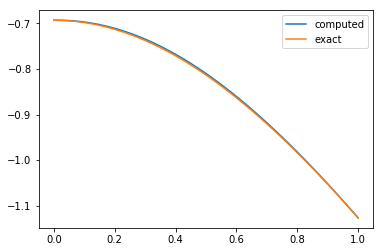

In [0]:
plt.plot(pde1.s_space, pde1.s_val, label = 'computed')

exact_val = pde1.exact_sol(pde1.s_space)
plt.plot(pde1.s_space, exact_val, label = 'exact')
plt.legend()

print('>>>iteration error is ' + str(err))
print('>>>iter number is ' + str(n_iter))
print('>>>max norm of error is ' + str(np.max(np.abs(pde1.s_val-exact_val))))


In [0]:
pde1 = pde()
pde1.mdp_space_config(NUM=40) #if NUM is chosen to be 20 or bigger number, the result is bad
err, n_iter = pde1.value_iter(TOL = 0.0001, MAX_ITER = 3000)

>>>>> q_table size is 3321
iterated 10;
iterated 20;
iterated 30;
iterated 40;
iterated 50;
iterated 60;
iterated 70;
iterated 80;
iterated 90;
iterated 100;
iterated 110;
iterated 120;
iterated 130;
iterated 140;
iterated 150;
iterated 160;
iterated 170;
iterated 180;
iterated 190;
iterated 200;
iterated 210;
iterated 220;
iterated 230;
iterated 240;
iterated 250;
iterated 260;
iterated 270;
iterated 280;
iterated 290;
iterated 300;
iterated 310;
iterated 320;
iterated 330;
iterated 340;
iterated 350;
iterated 360;
iterated 370;
iterated 380;
iterated 390;
iterated 400;
iterated 410;
iterated 420;
iterated 430;
iterated 440;
iterated 450;
iterated 460;
iterated 470;
iterated 480;
iterated 490;
iterated 500;
iterated 510;
iterated 520;
iterated 530;
iterated 540;
iterated 550;
iterated 560;
iterated 570;
iterated 580;
iterated 590;
iterated 600;


>>>iteration error is 9.936393208798133e-05
>>>iter number is 603
>>>max norm of error is 0.014473709869712303


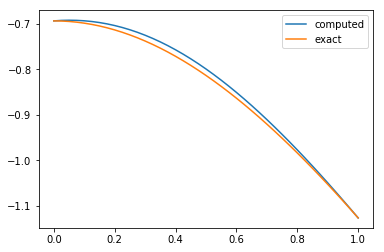

In [0]:
plt.plot(pde1.s_space, pde1.s_val, label = 'computed')

exact_val = pde1.exact_sol(pde1.s_space)
plt.plot(pde1.s_space, exact_val, label = 'exact')
plt.legend()

print('>>>iteration error is ' + str(err))
print('>>>iter number is ' + str(n_iter))
print('>>>max norm of error is ' + str(np.max(np.abs(pde1.s_val-exact_val))))

In [0]:
pde1 = pde()
pde1.mdp_space_config(NUM=30) #if NUM is chosen to be 20 or bigger number, the result is bad
err, n_iter = pde1.value_iter(TOL = 0.0001, MAX_ITER = 3000)

>>>>> q_table size is 1952
iterated 10;
iterated 20;
iterated 30;
iterated 40;
iterated 50;
iterated 60;
iterated 70;
iterated 80;
iterated 90;
iterated 100;
iterated 110;
iterated 120;
iterated 130;
iterated 140;
iterated 150;
iterated 160;
iterated 170;
iterated 180;
iterated 190;
iterated 200;
iterated 210;
iterated 220;
iterated 230;
iterated 240;
iterated 250;
iterated 260;
iterated 270;
iterated 280;
iterated 290;
iterated 300;
iterated 310;
iterated 320;
iterated 330;
iterated 340;
iterated 350;
iterated 360;
iterated 370;
iterated 380;
iterated 390;
iterated 400;


>>>iteration error is 9.892090254515207e-05
>>>iter number is 407
>>>max norm of error is 0.008620113333681512


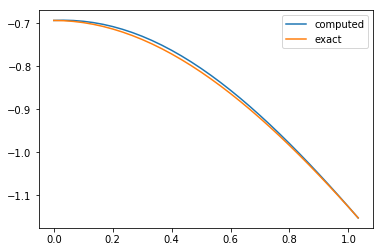

In [0]:
plt.plot(pde1.s_space, pde1.s_val, label = 'computed')

exact_val = pde1.exact_sol(pde1.s_space)
plt.plot(pde1.s_space, exact_val, label = 'exact')
plt.legend()

print('>>>iteration error is ' + str(err))
print('>>>iter number is ' + str(n_iter))
print('>>>max norm of error is ' + str(np.max(np.abs(pde1.s_val-exact_val))))